### 1. Importar las bibliotecas requeridas

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Exploración de training y testing set

In [3]:
path_train = '/content/drive/MyDrive/Colab Notebooks/11. Titanic machine learning/train.csv'
path_test = '/content/drive/MyDrive/Colab Notebooks/11. Titanic machine learning/test.csv'

In [4]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [5]:
df = train.append(test, ignore_index=True)

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
# Número de valores únicos por cada columna.

for col in df.columns:
    print('{}:'.format(col), len(df['{}'.format(col)].unique()))

PassengerId: 1309
Survived: 3
Pclass: 3
Name: 1307
Sex: 2
Age: 99
SibSp: 7
Parch: 8
Ticket: 929
Fare: 282
Cabin: 187
Embarked: 4


**No vale la pena incluir la columna "Cabin" ya que posee un total de 187 valores únicos y tan solo hay 295 filas con datos, la gran mayoría está vacía.**

**No vale la pena incluir la columna Ticket puesto que tiene 929 valores únicos, además que el ticket debería estar altamente correlacionado a la clase en la que el pasajero viajaba y al precio que este pagó.**

In [9]:
df[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881138,0.498854,0.385027,33.295479
std,14.413493,1.041658,0.865560,51.758668
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


**¿Qué pasa con las celdas de la columna "Fare" que están en 0? ¿Cuáles son estas? ¿Son valores que hacen falta o realmente tuvieron un costo de $0?**

In [10]:
print(len(df[df['Fare'] == 0]))
df[df['Fare'] == 0]

17


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [11]:
fare_0 = df[df['Fare'] == 0]
print(fare_0['Pclass'].value_counts())

1    7
2    6
3    4
Name: Pclass, dtype: int64


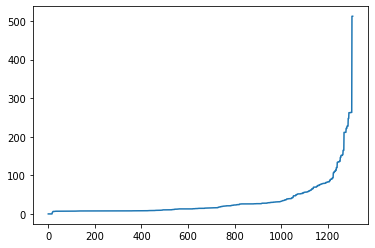

In [12]:
fare_graph = df['Fare'].sort_values(ignore_index=True)
fare_graph.plot(kind='line')

**Hay 15 tickets en total con un precio de 0 dólares. 5 son de personas que viajaban en 1ra clase, 6 eb 2da clase, y 4 en 3ra clase. Asumiremos que el valor del ticket para estas personas fue de 0, y NO lo tomaremos como un valor faltante.**

**La columna "Embarked" tiene dos celdas vacías o sin datos. ¿Cuáles son estas? ¿Por qué estos dos registros tienen el mismo número de ticket?**

In [13]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
tickets_same_number = {}

for ticket in df['Ticket']:
    if ticket not in tickets_same_number:
        tickets_same_number[ticket] = 1
    else:
        tickets_same_number[ticket] += 1

In [15]:
newDict = dict()

for (key, value) in tickets_same_number.items():
    if value >= 4:
        newDict[key] = value
print(len(newDict))
print(newDict)

35
{'349909': 5, '347082': 7, '382652': 6, '347077': 7, '19950': 6, 'SC/Paris 2123': 4, '3101295': 7, 'C.A. 34651': 4, 'CA 2144': 8, '347088': 6, 'S.O.C. 14879': 7, '1601': 8, 'W./C. 6608': 5, 'C.A. 2315': 4, 'C.A. 33112': 4, 'CA. 2343': 11, '4133': 5, 'LINE': 4, '230136': 4, 'PC 17755': 4, 'PC 17760': 4, '113781': 6, '17421': 4, 'PC 17608': 7, '36928': 4, '16966': 5, '113503': 5, 'PC 17757': 5, '113760': 4, '2666': 4, '12749': 4, 'PC 17483': 4, '220845': 5, '24160': 4, 'W./C. 6607': 4}


In [16]:
df[df['Ticket']=='347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,64,0.0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S
167,168,0.0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S
360,361,0.0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S
634,635,0.0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S
642,643,0.0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S
819,820,0.0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S


**Hay 19 números de ticket que se repiten en la base de datos más de cuatro veces. Parece ser que estas son personas que viajaban acompañadas con hermanos, padres, esposos, o hijos. Este puede ser un buen dato a tomar en cuenta para la predicción.**

### 3. Data cleaning y feature engineering

#### 3.1 Eliminar la columna "Cabin", "Name" y "Ticket".

In [17]:
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)
df = df.drop('Cabin', axis = 1)

In [18]:
# Extraer el título de la persona a partir de "Name" como Mr., o Ms.
# El rendimiento del modelo disminuyó al incluir esta característica.
# El código se presenta en la siguiente celda como una referencia:

In [19]:
# df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# print(df['Title'].unique())

# summarized_titles = {
#     "Capt":       "Officer",
#     "Col":        "Officer",
#     "Major":      "Officer",
#     "Jonkheer":   "Royalty",
#     "Don":        "Royalty",
#     "Sir" :       "Royalty",
#     "Dr":         "Officer",
#     "Rev":        "Officer",
#     "the Countess":"Royalty",
#     "Dona":       "Royalty",
#     "Mme":        "Mrs",
#     "Mlle":       "Miss",
#     "Ms":         "Mrs",
#     "Mr" :        "Mr",
#     "Mrs" :       "Mrs",
#     "Miss" :      "Miss",
#     "Master" :    "Master",
#     "Lady" :      "Royalty"}

# df.Title = df.Title.map(summarized_titles)
# print(df['Title'].value_counts())

#### 3.2 Imputar valores en blanco de "Embarked" según la moda.

In [20]:
print(df['Embarked'].value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [21]:
df['Embarked'] = df['Embarked'].fillna(value = 'S')

#### 3.3 Imputar valores en blanco de "Age" basado en el promedio.

In [22]:
df.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [23]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

#### 3.4 Convertir las edades de "Age" a rangos de 5 categorías.

In [24]:
df['Age'] = pd.cut(df['Age'].astype(int), 5, labels=False)

In [25]:
df['Age'].value_counts()

1    752
2    304
0    134
3    106
4     13
Name: Age, dtype: int64

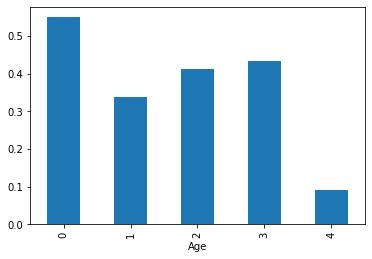

In [26]:
df[['Age', 'Survived']].groupby('Age')['Survived'].mean().plot(kind='bar')

#### 3.5 Imputar valores en blanco de Fare basado en el promedio.

In [27]:
df.groupby(['Pclass'])['Fare'].mean()


Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [28]:
df['Fare'] = df.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.mean()))

#### 3.6 Convertir las precios de "Fare" a rangos de 5 categorías.

In [29]:
df['Fare'] = pd.qcut(df['Fare'], 5, labels=False)

In [30]:
df['Fare'].value_counts()

0    275
3    265
4    259
2    256
1    254
Name: Fare, dtype: int64

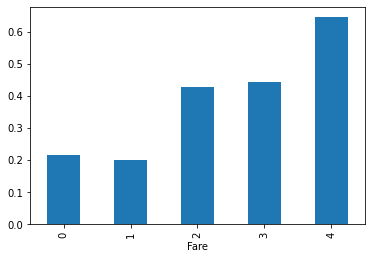

In [31]:
df[['Fare', 'Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar')

#### 3.7 Crear columna con el total de acompañantes.

In [32]:
df['TotalAcompañantes'] = df['SibSp'] + df['Parch']

#### 3.8 Convertir el no. de acompañantes a rangos de 2 categorías.

In [33]:
df['Acompañantes'] = pd.cut(df['TotalAcompañantes'], bins=[-1,0, 12], 
                            right=True, labels=False)

In [34]:
df['Acompañantes'].value_counts()

0    790
1    519
Name: Acompañantes, dtype: int64

#### 3.9 Convertir "Sex" y "Embarked" a código númerico.

In [35]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [36]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#### 3.10 Eliminar la columnas de "SibSp" y "Parch".

In [37]:
df = df.drop('SibSp', axis = 1)
df = df.drop('Parch', axis = 1)

In [38]:
# Crear dummy variables (one-hot-encoding) de variables categóricas.
# El rendimiento del modelo disminuyó al incluir esta característica.
# OJO con que "Age" y "Fare" se habían convertido a categorías.
# El código se presenta en la siguiente celda como una referencia:

In [39]:
# df = pd.get_dummies(df['Pclass']).join(df)
# df = pd.get_dummies(df['Sex']).join(df)
# df = pd.get_dummies(df['Age']).join(df)
# df = pd.get_dummies(df['Fare']).join(df)
# df = pd.get_dummies(df['Embarked']).join(df)

# df = df.drop('Pclass', axis = 1)
# df = df.drop('Sex', axis = 1)
# df = df.drop('Age', axis = 1)
# df = df.drop('Fare', axis = 1)
# df = df.drop('Embarked', axis = 1)

#### 3.11 Explorar base de datos limpia y con nuevos features.

In [40]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,TotalAcompañantes,Acompañantes
0,1,0.0,3,0,1,0,0,1,1
1,2,1.0,1,1,2,4,1,1,1
2,3,1.0,3,1,1,1,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        1309 non-null   int64  
 1   Survived           891 non-null    float64
 2   Pclass             1309 non-null   int64  
 3   Sex                1309 non-null   int64  
 4   Age                1309 non-null   int64  
 5   Fare               1309 non-null   int64  
 6   Embarked           1309 non-null   int64  
 7   TotalAcompañantes  1309 non-null   int64  
 8   Acompañantes       1309 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 92.2 KB


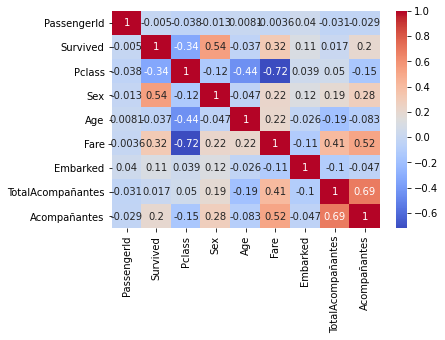

In [42]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### 4. Separación de training y testing set

In [43]:
train_cleaned = df.loc[:890]
test_cleaned = df.loc[891:].reset_index(drop=True)

In [44]:
y_train = train_cleaned['Survived'].values
x_train = train_cleaned.drop(['PassengerId', 'Survived'], axis=1).values

In [45]:
x_test = test_cleaned.drop(['PassengerId', 'Survived'], axis=1).values
id_test = test_cleaned['PassengerId']

In [46]:
# Estandarizar todas las características a una escala de 0 a 1.
# El rendimiento del modelo disminuyó al incluir este paso.
# El código se presenta en la siguiente celda como una referencia:

In [47]:
# scaler = preprocessing.MinMaxScaler()
# scaler = scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# print(scaler.data_max_)
# print(scaler.data_min_)
# x_test = scaler.transform(x_test)

In [48]:
# EN VEZ de usar una escala de 0 a 1, también se probó normalizar los features.
# Pero el rendimiento del modelo igualmente disminuyó.
# El código se presenta en la siguiente celda como una referencia:

In [49]:
# normalizer = preprocessing.StandardScaler()
# normalizer = normalizer.fit(x_train)
# x_train = normalizer.transform(x_train)
# print(normalizer.mean_)
# x_test = normalizer.transform(x_test)

### 5. Random Forest machine learning model

#### 5.1 Training del modelo.

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators = 500, max_depth = 4, 
                             criterion = 'entropy')

In [52]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
# Usar GridSearchCV para encontrar los parámetros óptimos del modelo. 
# El rendimiento del modelo disminuyó al incluir los parámetros encontrados.
# Un buen rendimiento en el training set != a uno bueno en el testing set.
# El código se presenta en la siguiente celda como una referencia:

In [54]:
# from sklearn.model_selection import GridSearchCV

# rfc_params = dict(n_estimators = [n for n in range(100, 600, 100)],
#                   max_depth = [n for n in range(1, 11)], 
#                   criterion = ['gini', 'entropy'])

# rfc = RandomForestClassifier()
# model = GridSearchCV(estimator = rfc, param_grid = rfc_params)

# model.fit(x_train, y_train)

# model.best_params_

#### 5.2 Testing del modelo en training set.

In [55]:
accuracy_train = round(rfc.score(x_train, y_train) * 100, 2)
print (accuracy_train)

83.16


#### 5.3 Testing del modelo en testing set.

In [56]:
rfc_pred = rfc.predict(x_test)
rfc_pred  = pd.Series(rfc_pred)

In [57]:
predictions = pd.DataFrame({'PassengerId': id_test, 'Survived': rfc_pred})

In [58]:
predictions.to_csv('/content/drive/MyDrive/Colab Notebooks/11. Titanic machine learning/predictions.csv', index = False) 

**Random forest alcanzó un accuracy en el testing set de Kaggle de 78.95%**

### 6. Otros machine learning models

#### 6.1 Decision tree model

In [59]:
# from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=14, splitter='random')

# dtc.fit(x_train, y_train)

# dtc_pred = dtc.predict(x_test)

**Decision tree model alcanzó un accuracy en el testing set de Kaggle de 77.76%**

#### 6.2 XGBoost model

In [60]:
# from xgboost import XGBClassifier

# xgb_clf = XGBClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 40)

# xgb_clf.fit(x_train, y_train)

# xgb_pred = xgb_clf.predict(x_test)

**XGBoost model alcanzó un accuracy en el testing set de Kaggle de 77.51%**

#### 6.3 Logistic regression model

In [61]:
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression(C = 0.1, penalty = 'l2')

# logreg.fit(x_train, y_train)

# logreg_pred = logreg.predict(x_test)

**Logistic regression alcanzó un accuracy en el testing set de Kaggle de 78.47%**

#### 6.4 MLP deep learning model

**Favor ver el otro notebook dentro de este mismo repositorio para ver el código.** 
**MLP deep learning model logró un accuracy en el testing set de Kaggle de 78.23%**